**To analyse the stock prices for banks.**

PS- Not meant to be robust financial analysis or be taken as financial advice.

In [2]:
from  pandas_datareader import data,wb 
import  pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime
import plotly 
import cufflinks as cf
cf.go_offline()
%matplotlib inline 

In [3]:
start = datetime.datetime(2011,1,1)
end = datetime.datetime(2021,1,1)

In [4]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [5]:
df=data.DataReader(['BAC','C','GS','JPM','MS','WFC'],'yahoo',start,end)

In [6]:
tickers=['BAC','C','GS','JPM','MS','WFC']

In [7]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1, keys=tickers)

In [8]:
bank_stocks.columns.names=['Bank Tickers','Stock Info']

In [9]:
bank_stocks.head()

Bank Tickers    BAC                                                       C  \
Stock Info     High    Low   Open  Close       Volume  Adj Close       High   
Date                                                                          
2010-12-31    13.38  13.22  13.23  13.34   63036100.0  11.651569  47.599998   
2011-01-03    14.23  13.80  13.85  14.19  354322300.0  12.393984  49.000000   
2011-01-04    14.25  14.02  14.23  14.24  218978200.0  12.437654  49.400002   
2011-01-05    14.60  14.15  14.19  14.50  246151200.0  12.664748  50.000000   
2011-01-06    14.69  14.34  14.54  14.44  241658500.0  12.612343  50.500000   

Bank Tickers                                   ...         MS             \
Stock Info          Low       Open      Close  ...       Open      Close   
Date                                           ...                         
2010-12-31    47.200001  47.500000  47.299999  ...  27.219999  27.209999   
2011-01-03    47.799999  47.799999  49.000000  ...  27.629999  28.230000   
2011-01-04    48.299999  49.099998  49.000000  ...  28.459999  28.469999   
2011-01-05    48.799999  48.799999  49.700001  ...  28.360001  28.830000   
2011-01-06    49.299999  50.000000  49.500000  ...  28.850000  28.799999   

Bank Tickers                               WFC                        \
Stock Info        Volume  Adj Close       High        Low       Open   
Date                                                                   
2010-12-31     6643200.0  22.531651  31.030001  30.660000  30.719999   
2011-01-03    21176700.0  23.376272  31.660000  31.160000  31.299999   
2011-01-04    12859900.0  23.575008  31.940001  31.490000  31.650000   
2011-01-05    15101100.0  23.873106  32.500000  31.400000  31.410000   
2011-01-06    13200900.0  23.848267  32.470001  32.119999  32.150002   

Bank Tickers                                    
Stock Info        Close      Volume  Adj Close  
Date                                            
2010-12-31    30.990000  12108400.0  22.980227  
2011-01-03    31.580000  34397100.0  23.417738  
2011-01-04    31.650000  30341100.0  23.469646  
2011-01-05    32.369999  43245600.0  24.003551  
2011-01-06    32.150002  32500000.0  23.840412  

[5 rows x 36 columns]

In [10]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Tickers
BAC     35.639999
C       81.910004
GS     273.380005
JPM    141.089996
MS      68.529999
WFC     65.930000
dtype: float64

In [11]:
returns=pd.DataFrame()

In [12]:
for tick in tickers:
    returns[tick+' Return']=bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2010-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,0.063718,0.035941,0.029079,0.027346,0.037486,0.019038
2011-01-04,0.003524,0.000000,0.000173,0.013309,0.008502,0.002217
2011-01-05,0.018258,0.014286,0.005315,0.012228,0.012645,0.022749
2011-01-06,-0.004138,-0.004024,-0.010287,-0.004922,-0.001041,-0.006796


In [13]:
sns.set_style('whitegrid')

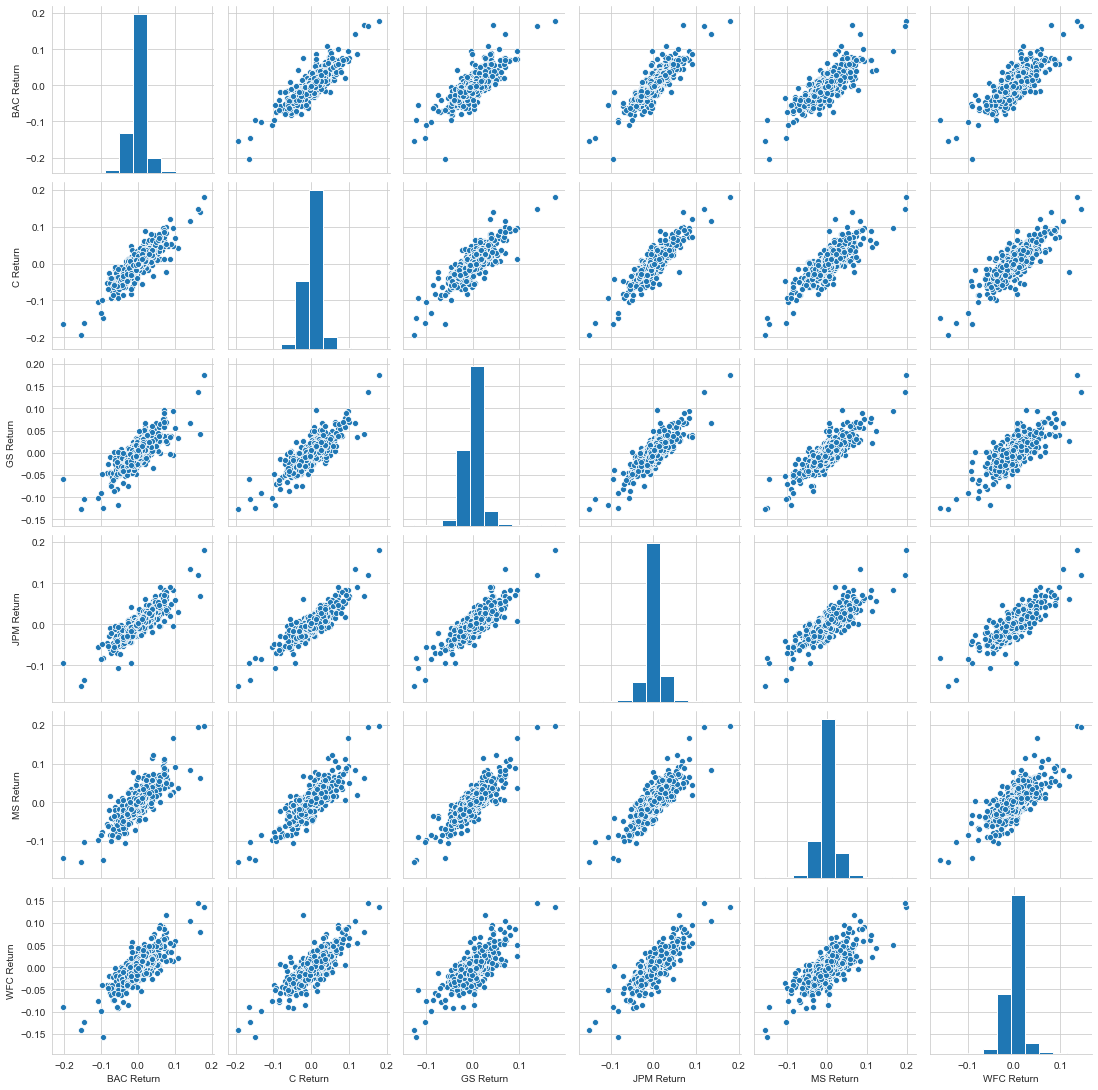

In [14]:
sns.pairplot(returns[1:])

In [15]:
returns.idxmin()

BAC Return   2011-08-08
C Return     2020-03-16
GS Return    2020-03-16
JPM Return   2020-03-16
MS Return    2020-03-16
WFC Return   2020-03-12
dtype: datetime64[ns]

In [16]:
returns.idxmax()

BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
MS Return    2020-03-13
WFC Return   2020-03-24
dtype: datetime64[ns]

In [17]:
returns.std()#Morgan Stanley riskiest

BAC Return    0.022414
C Return      0.022463
GS Return     0.018464
JPM Return    0.018150
MS Return     0.022777
WFC Return    0.018275
dtype: float64

In [18]:
returns.loc['2020-01-01':'2020-12-31'].std()

BAC Return    0.036933
C Return      0.042502
GS Return     0.032929
JPM Return    0.034272
MS Return     0.036164
WFC Return    0.038573
dtype: float64

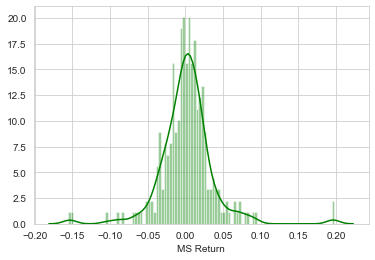

In [21]:
sns.distplot(returns.loc['2020-01-01':'2020-12-31']['MS Return'],color='green',bins=100)

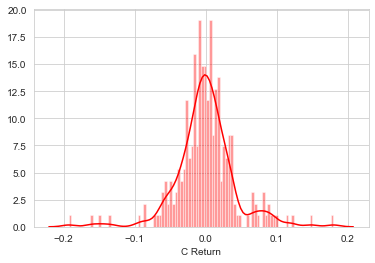

In [27]:
sns.distplot(returns.loc['2020-01-01':'2020-12-31']['C Return'],color='red',bins=100)

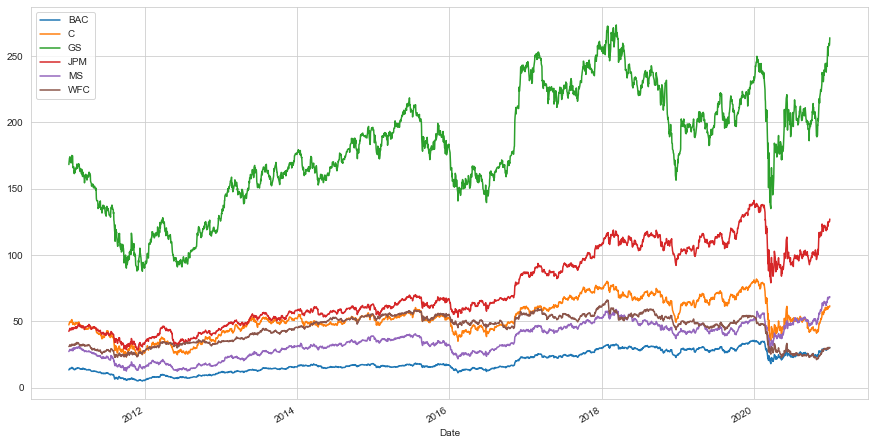

In [34]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(15,8),label=tick)
plt.legend()

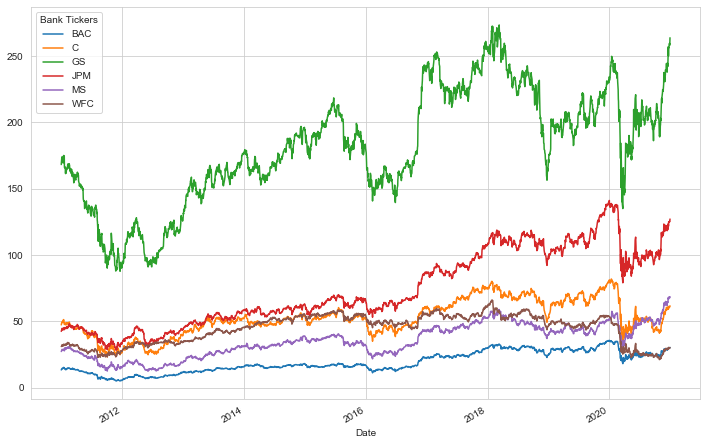

In [36]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,8))


In [37]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

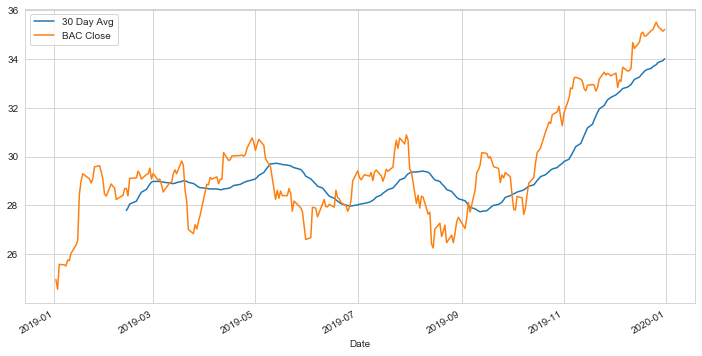

In [42]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2019-01-01':'2020-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2019-01-01':'2020-01-01'].plot(label='BAC Close')
plt.legend()

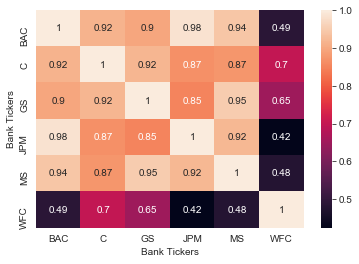

In [43]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

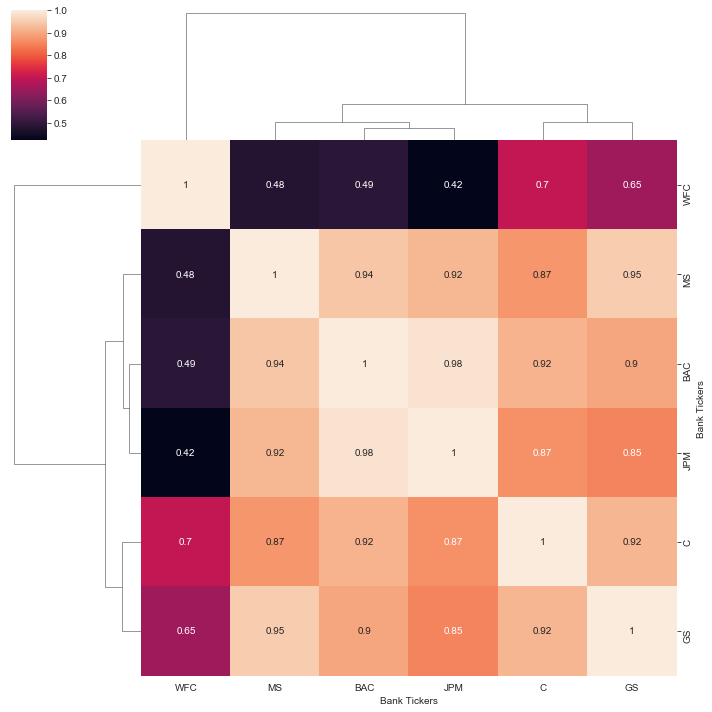

In [44]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [47]:
close_corr=bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [48]:
BAC[['Open','High','Low','Close']].loc['2020-01-01':'2021-01-01'].iplot(kind='candle')

In [49]:
C['Close'].loc['2020-01-01':'2021-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [53]:
MS['Close'].loc['2020-01-01':'2021-01-01'].ta_plot(study='boll')